In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import matplotlib.font_manager as fm
import yfinance as yf
import datetime
from datetime import timedelta, datetime
import openpyxl
import setuptools
import pandas_datareader as pdr

In [155]:
dfMENSAL = pd.read_excel('BASE_MENSAL_GARE_JUN.xlsx')
dfMENSAL = dfMENSAL.rename(columns={'CATEGORIAS ATUAIS':'CATEGORIAS_ATUAIS', 'CATEGORIAS ANTIGAS':'CATEGORIAS_ANTIGAS'})
dfCOMPRA = dfMENSAL.query('OPERAÇÃO == "Compra"')
dfVENDA = dfMENSAL.query('OPERAÇÃO == "Venda"')

dfCOMPRA_final = dfCOMPRA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                      'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last', 'VAR_PRECO':'sum','CATEGORIAS_ATUAIS':'last',
                                                                      'CATEGORIAS_ANTIGAS':'first','Participação_sup':'sum','GARE15':'first','GALG15':'first','DATA':'first',
                                                                      'CATEGORIAS':'first'})
                                                                                                                            
dfVENDA_final = dfVENDA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                    'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last','VAR_PRECO':'sum','CATEGORIAS_ATUAIS':'last',
                                                                    'CATEGORIAS_ANTIGAS':'first','Participação_sup':'sum','GARE15':'first','GALG15':'first','DATA':'first',
                                                                    'CATEGORIAS':'first'})

total_compra = dfCOMPRA['VAR_PRECO'].sum()
total_venda = dfVENDA['VAR_PRECO'].sum()
delta_sum = total_compra+total_venda
print('o valor de compra é {} e o valor de venda é {}, e o total é {}'.format(total_compra, total_venda, delta_sum))

#INSIRO O CAMINHO DAS FONTES
caminho_Avenir = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Avenir Next LT Pro Regular.otf'
caminho_Geometeos = r'C:\\Users\\LucasCavalcante\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Geometos Rounded.ttf'

#ALIMENTO DUAS VARIAVEIS COM AS FONTES
Avenir = fm.FontProperties(fname=caminho_Avenir)
Geometeos = fm.FontProperties(fname=caminho_Geometeos)

#FAÇO O MATPLTOLIB RECONHEÇER AS FONTES COMO FAMILIARIES
plt.rcParams['font.family'] = Avenir.get_name()
plt.rcParams['font.family'] = Avenir.get_name()

o valor de compra é 58197710.27000001 e o valor de venda é 58188810.269999996, e o total é 116386520.54


In [156]:
def graf_barras_zeragens(
    df,
    filename,
    color='#3B5279',
    figsize=(8, 4),
    width=0.8,
    fontsize_y=2,
    fontsize_label=9,
    font=Avenir
):

    fig, ax = plt.subplots(figsize=figsize)

    sb.barplot(
        data=df,
        x='VAR_PRECO',
        y='CATEGORIAS_ANTIGAS',
        ax=ax,
        color=color,
        dodge=True,
        width=width
    )

    ylabels = df['CATEGORIAS_ANTIGAS'].unique()
    ax.set_yticks(range(len(ylabels)))
    ax.set_yticklabels(ylabels, fontsize=fontsize_y, fontproperties=font)

    for p in ax.patches:
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2

        if abs(x) >= 1:
            label = f"{int(round(abs(x))):,}".replace(",", ".")

            ax.text(
                x + (0.01 * x) if x >= 0 else x - (0.01 * abs(x)),
                y,
                label,
                ha='left' if x >= 0 else 'right',
                va='center',
                color='black',
                fontsize=fontsize_label,
                fontproperties=font
            )

    # Ajustar as bordas
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)

    # Rótulos e legenda
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='-', loc='lower right', fontsize=0)

    plt.tight_layout()

    fig.savefig(filename, transparent=True, dpi=300, bbox_inches='tight')
    


def graf_compra_e_venda(
        df_cv,
        filename_cv,
        palette_cv={'Venda': '#767070', 'Compra': '#3B5279'},
        figsize_cv=(8, 4),
        width_cv=0.8,
        fontsize_y=2,
        fontsize_label_cv=9,
        font_cv=Avenir
):
    fig, ax = plt.subplots(figsize=figsize_cv)

    sb.barplot(
        data=df_cv,
        x='VAR_PRECO',
        y='CATEGORIAS_ANTIGAS',
        hue='OPERAÇÃO',
        ax=ax,
        palette=palette_cv,
        dodge=True,
        width=width_cv
    )

    # usa o DataFrame certo
    ylabels = df_cv['CATEGORIAS_ANTIGAS'].unique()
    ax.set_yticks(range(len(ylabels)))
    ax.set_yticklabels(ylabels, fontsize=fontsize_y, fontproperties=font_cv)

    for p in ax.patches:
        # Obtém a largura (valor de x) e a posição do centro da barra
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2

        # Adiciona rótulos formatados com separador de milhares
        if abs(x) >= 1:
            label = f"{int(round(abs(x))):,}".replace(",", ".")

            ax.text(
                x + (0.01 * x) if x >= 0 else x - (0.01 * abs(x)),
                y,
                label,
                ha='left' if x >= 0 else 'right',
                va='center',
                color='black',
                fontsize=fontsize_label_cv,
                fontproperties=font_cv
            )

    # Ajustar os spines (bordas)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)

    # Rótulos e legenda
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='-', loc='lower right', fontsize=0)

    plt.tight_layout()

    fig.savefig(filename_cv, transparent=True, dpi=300, bbox_inches='tight')
    

In [157]:
dfCOMPRA_final['Participação_sup'] = (dfCOMPRA_final['VAR_PRECO']/total_compra)*100
compra1 = dfCOMPRA_final['Participação_sup'].sum()
dfVENDA_final['Participação_sup'] = (dfVENDA_final['VAR_PRECO']/total_venda)*100
venda1 = dfVENDA_final['Participação_sup'].sum()
print('o total de compra é {} e o total de venda é {}'.format(compra1, venda1))

o total de compra é 99.99999999999999 e o total de venda é 100.0


In [158]:
plim = dfCOMPRA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

plim.set_index('CATEGORIAS')

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

plim['OPERAÇÃO_PF_PJ'] = plim['OPERAÇÃO'] + ' ' + plim['PF_PJ']

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['% PARTICIPAÇÃO'] = ((plim['VAR_PRECO']/(total_compra))*100).round(2)

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

mapeamento = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M',10:'>15M'}

plim['CLASSE_CATEGORIA'] = plim['CATEGORIAS'].map(mapeamento)

plim = plim.sort_values(by='CATEGORIAS')

plim['VAR_PRECO'].astype(float)

plim['VAR_PRECO'] = plim['VAR_PRECO'].round(2)

plim

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,9820760.02,Compra PF,16.87,0-1k
1,1,Compra,PJ,41653.80,Compra PJ,0.07,0-1k
2,2,Compra,PF,10672175.85,Compra PF,18.34,1k-5k
3,2,Compra,PJ,121026.62,Compra PJ,0.21,1k-5k
4,3,Compra,PF,13045925.39,Compra PF,22.42,5k-20k
5,3,Compra,PJ,135715.67,Compra PJ,0.23,5k-20k
6,4,Compra,PF,8654914.98,Compra PF,14.87,20k-50k
7,4,Compra,PJ,730558.26,Compra PJ,1.26,20k-50k
8,5,Compra,PF,5371105.66,Compra PF,9.23,50k-100k
9,5,Compra,PJ,239178.36,Compra PJ,0.41,50k-100k


In [159]:
v = dfVENDA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

v.set_index('CATEGORIAS')

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v['OPERAÇÃO_PF_PJ'] = v['OPERAÇÃO'] + ' ' + v['PF_PJ']

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['% PARTICIPAÇÃO'] = ((v['VAR_PRECO']/(total_venda))*100).round(2)

mapeamento = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M',10:'>15M'}

v['CLASSE_CATEGORIA'] = v['CATEGORIAS'].map(mapeamento)

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v = v.sort_values(by='CATEGORIAS')

v['VAR_PRECO'].astype(float)

v['VAR_PRECO'] = v['VAR_PRECO'].round(2)

v

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Venda,PF,-2744220.72,Venda PF,-4.72,0-1k
1,1,Venda,PJ,-18819.20,Venda PJ,-0.03,0-1k
2,2,Venda,PF,-5851135.72,Venda PF,-10.06,1k-5k
3,2,Venda,PJ,-26019.15,Venda PJ,-0.04,1k-5k
4,3,Venda,PF,-8402477.85,Venda PF,-14.44,5k-20k
5,3,Venda,PJ,-112382.49,Venda PJ,-0.19,5k-20k
6,4,Venda,PF,-7804503.27,Venda PF,-13.41,20k-50k
7,4,Venda,PJ,-1002845.06,Venda PJ,-1.72,20k-50k
8,5,Venda,PF,-5590516.23,Venda PF,-9.61,50k-100k
9,5,Venda,PJ,-518705.18,Venda PJ,-0.89,50k-100k


C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_30980\1492811276.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next L

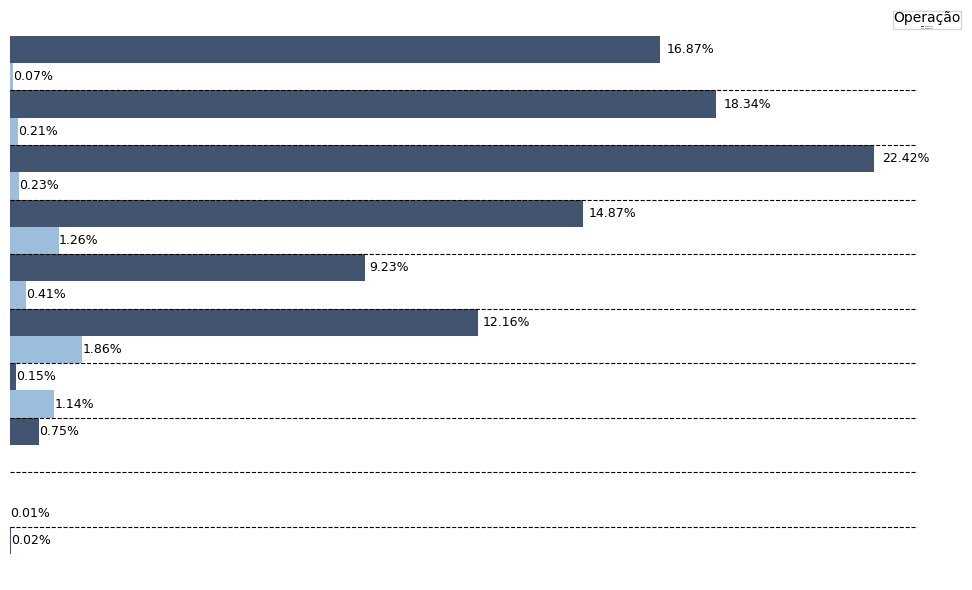

In [160]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=plim, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Compra PF': '#3B5279', 'Compra PJ': '#91BDE7','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(plim['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)


ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='upper right', fontsize = 0.05)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('COMPRA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_30980\1108589480.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT P

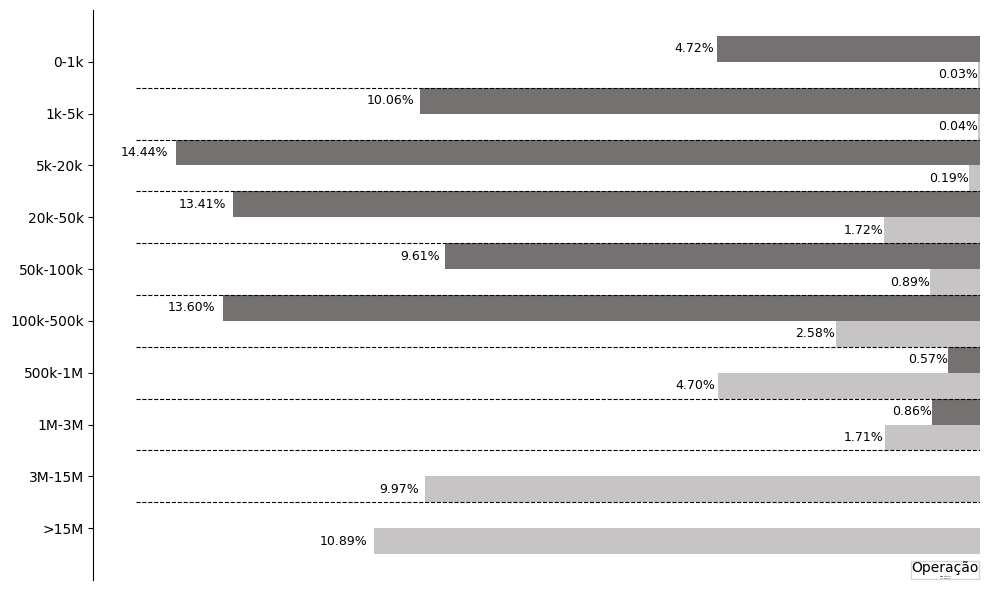

In [161]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=v, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Venda PF': '#767070', 'Venda PJ': '#C6C4C4','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(v['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)

#ax.vlines(x=0, ymin=-0.5, ymax=len(graf['CATEGORIAS'].unique()) - 0.5, color='black', linestyle='-', linewidth=1.5)

#ticks = [100000, 500000, 1000000, 2000000]
#ax.set_xticks(ticks)
#ax.set_xticklabels([f'R${x:,}' for x in ticks])
#ax.xaxis.set_tick_params(labelsize = (12))

#ax.set_yticks(range(len(ylabels)))
#ax.set_yticklabels(ylabels, fontsize=11, fontproperties = Avenir)
ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(True)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='lower right', fontsize = 1)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('VENDA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [162]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS_ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
of = 'GARE15'
of2 = 'GALG15'

TOP10_Compra = dfCOMPRA_final[[Nome,cat,tipo,fin_mov,cat_atuais,of,of2]]

TOP10_Compra = TOP10_Compra.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Compra['VAR_PRECO'] = TOP10_Compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

TOP10_Compra = TOP10_Compra.set_index('NOME')

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Compra['CATEGORIAS'] = TOP10_Compra['CATEGORIAS'].map(mapear)

TOP10_Compra

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS,GARE15,GALG15
NOME,,,,,,
MARCELO SANTOS LEITE,100k-500k,PF,665590.00,100k-500k,AUSENTE,AUSENTE
XTX MARKETS TRADING LIMITED,500k-1M,PJ,661065.71,500k-1M,AUSENTE,AUSENTE
JAU SCHNEIDER VON LINSINGEN,100k-500k,PF,494461.00,500k-1M,GARE15,AUSENTE
BRL VI FI IMOBILIARIO,100k-500k,PJ,482350.00,100k-500k,AUSENTE,AUSENTE
RIGEL COVE LP,20k-50k,PJ,449112.74,100k-500k,AUSENTE,AUSENTE
LUANA VON LINSINGEN PASETCHNY,100k-500k,PF,385000.00,500k-1M,GARE15,GALG15
HENRIQUE CRUZ VIEIRA,100k-500k,PF,381822.16,50k-100k,AUSENTE,AUSENTE
JOSE RICARDO DA COSTA GUIMARAES,100k-500k,PF,372899.14,100k-500k,AUSENTE,AUSENTE
ROSEMERI WEISSBURGER RICARDO,100k-500k,PF,366718.00,100k-500k,AUSENTE,AUSENTE


In [163]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS_ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
qtde = 'TOTAL_NOVO'

TOP10_Venda = dfVENDA_final[[Nome,cat,tipo,fin_mov, cat_atuais,of,of2]]

TOP10_Venda = TOP10_Venda.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Venda['VAR_PRECO'] = TOP10_Venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Venda['CATEGORIAS'] = TOP10_Venda['CATEGORIAS'].map(mapear)

TOP10_Venda['CATEGORIAS_ATUAIS'] = TOP10_Venda['CATEGORIAS_ATUAIS'].fillna('0-1k')

TOP10_Venda.set_index('NOME')

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS_ATUAIS,GARE15,GALG15
NOME,,,,,,
AAA FUNDO DE INVESTIMENTO MULTIMERCADO CREDITO PRIVADO INVES,>15M,PJ,6339112.24,>15M,AUSENTE,AUSENTE
BRL VI FI IMOBILIARIO,3M-15M,PJ,5023555.88,3M-15M,AUSENTE,AUSENTE
XTX MARKETS TRADING LIMITED,500k-1M,PJ,1769542.11,100k-500k,AUSENTE,AUSENTE
XP SELECTION FUNDO DE FIM - FII,1M-3M,PJ,993105.57,50k-100k,AUSENTE,AUSENTE
MALIZ IMOBILIARIA LTDA,500k-1M,PJ,967776.81,0-1k,GARE15,AUSENTE
RIGEL COVE LP,20k-50k,PJ,746147.83,20k-50k,AUSENTE,AUSENTE
FATOR VERIT MULTIESTRATGIA FUNDO DE INVESTIMENTO IMOBILIRIO,3M-15M,PJ,720676.39,1M-3M,AUSENTE,AUSENTE
GUSTAVO BELLO ZAIANTCHICK,1M-3M,PF,502307.40,500k-1M,AUSENTE,AUSENTE
JOSE RICARDO DA COSTA GUIMARAES,100k-500k,PF,375753.29,100k-500k,AUSENTE,AUSENTE


# CATEGORIAS QUE MAIS COMPRARAM E VENDERAM

In [164]:
CGCV = dfMENSAL.groupby(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])['VAR_PRECO'].sum()
CGCV_df = CGCV.reset_index()

vendas = (
    CGCV_df[CGCV_df['OPERAÇÃO'] == 'Venda']
    .set_index('CATEGORIAS_ANTIGAS')['VAR_PRECO']
    .sort_values(ascending = False)
)

categoria_ordem = pd.CategoricalDtype(categories=vendas.index, ordered=True)

CGCV_df['CATEGORIAS_ANTIGAS'] = CGCV_df['CATEGORIAS_ANTIGAS'].astype(categoria_ordem)
CGCV_df = CGCV_df.sort_values(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'], ascending=[True, False])

CGCV_sorted = CGCV_df.set_index(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])

CGCV_sorted = (CGCV_sorted['VAR_PRECO']/1000).round(0)

CGCV_dataf = pd.DataFrame(CGCV_sorted)

CGCV_dataf = CGCV_dataf.reset_index()

CGCV_dataf

,CATEGORIAS_ANTIGAS,OPERAÇÃO,VAR_PRECO
0,100k-500k,Venda,11212.0
1,100k-500k,Compra,9384.0
2,5k-20k,Venda,8542.0
3,5k-20k,Compra,13340.0
4,20k-50k,Venda,8069.0
5,20k-50k,Compra,9201.0
6,>15M,Venda,6339.0
7,>15M,Compra,9.0
8,50k-100k,Venda,6049.0
9,50k-100k,Compra,5466.0


# CATEGORIAS QUE MAIS ZERARAM

In [165]:
def zeragem(ca):
    if ca == '0-1k':
        return 'Zerou'
    else:
        return 'Nao Zerou'

dfVENDA_final['ZERAGEM'] = dfVENDA_final['CATEGORIAS_ATUAIS'].apply(zeragem)

dfZERADOS = dfVENDA_final.query('ZERAGEM == "Zerou"')

CMZ_cotistas = dfZERADOS.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].count()
CMZ_cotistas = CMZ_cotistas.sort_values(ascending=False)


CMZ_cotistas_df = pd.DataFrame(CMZ_cotistas)
CMZ_cotistas_df = CMZ_cotistas_df.reset_index()
CMZ_cotistas_df


,CATEGORIAS_ANTIGAS,VAR_PRECO
0,0-1k,13368
1,1k-5k,2638
2,5k-20k,687
3,20k-50k,209
4,50k-100k,62
5,100k-500k,36
6,500k-1M,1


In [166]:
dfVENDA_final['ZERAGEM'] = dfVENDA_final['CATEGORIAS_ATUAIS'].apply(zeragem)

dfZERADOS = dfVENDA_final.query('ZERAGEM == "Zerou"')

CMZ = dfZERADOS.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].sum()
CMZ = CMZ.sort_values(ascending=False)

CMZ_df = pd.DataFrame(CMZ)
CMZ_df = (CMZ_df['VAR_PRECO']/1000).round(0)
CMZ_df = CMZ_df.reset_index()
CMZ_df

,CATEGORIAS_ANTIGAS,VAR_PRECO
0,5k-20k,7049.0
1,20k-50k,6954.0
2,100k-500k,6753.0
3,1k-5k,5315.0
4,50k-100k,4800.0
5,0-1k,2747.0
6,500k-1M,968.0


In [167]:
dfVENDA_final['ZERAGEM'] = dfVENDA_final['CATEGORIAS_ATUAIS'].apply(zeragem)

dfZERADOS = dfVENDA_final.query('ZERAGEM == "Zerou"')

CMZ_data = dfZERADOS.groupby(['DATA'])['VAR_PRECO'].sum()
CMZ_data = CMZ_data.sort_values(ascending=False)

CMZ_df_data = pd.DataFrame(CMZ_data)
CMZ_df_data = (CMZ_df_data['VAR_PRECO']/1000).round(0)
CMZ_df_data = CMZ_df_data.reset_index()

dfZERADOS_GARE15 = dfZERADOS.query('GARE15 == "GARE15"')

dfZERADOS_GARE15 = dfZERADOS_GARE15.groupby(['DATA'])['VAR_PRECO'].sum()
dfZERADOS_GARE15 = dfZERADOS_GARE15.sort_values(ascending=False)

dfZERADOS_GARE15 = pd.DataFrame(dfZERADOS_GARE15)
dfZERADOS_GARE15 = (dfZERADOS_GARE15['VAR_PRECO']/1000).round(0)
dfZERADOS_GARE15 = dfZERADOS_GARE15.reset_index()

dfZERADOS_GALG15 = dfZERADOS.query('GALG15 == "GALG15"')

dfZERADOS_GALG15 = dfZERADOS_GALG15.groupby(['DATA'])['VAR_PRECO'].sum()
dfZERADOS_GALG15 = dfZERADOS_GALG15.sort_values(ascending=False)

dfZERADOS_GALG15 = pd.DataFrame(dfZERADOS_GALG15)
dfZERADOS_GALG15 = (dfZERADOS_GALG15['VAR_PRECO']/1000).round(0)
dfZERADOS_GALG15 = dfZERADOS_GALG15.reset_index()

dfdatas_zerados = pd.merge(CMZ_df_data, dfZERADOS_GARE15[['DATA', 'VAR_PRECO']],
                           on = ['DATA'],
                           how = 'left',
                           suffixes= ('', '_GARE15'))

dfzerados_completo = pd.merge(dfdatas_zerados, dfZERADOS_GALG15[['DATA', 'VAR_PRECO']],
                              on = ['DATA'],
                              how = 'left',
                              suffixes=('', '_GALG15'))


dfzerados_completo

,DATA,VAR_PRECO,VAR_PRECO_GARE15,VAR_PRECO_GALG15
0,2025-06-06,4444.0,1168.0,856.0
1,2025-06-03,3795.0,1593.0,520.0
2,2025-06-23,3685.0,429.0,970.0
3,2025-07-01,3318.0,1472.0,705.0
4,2025-06-30,3025.0,668.0,346.0
5,2025-06-17,2725.0,1433.0,871.0
6,2025-06-09,2427.0,226.0,151.0
7,2025-06-20,2087.0,376.0,119.0
8,2025-06-10,2016.0,895.0,661.0
9,2025-06-18,1940.0,678.0,544.0


# DATA DE MAIORES ZERAGENS EM VOL FINANCEIRO

In [168]:
df100k500k = dfZERADOS.query('CATEGORIAS_ANTIGAS == "100k-500k"')
df100k500k['DATA'] = pd.to_datetime(df100k500k['DATA'], errors = 'coerce')
df100k500k = df100k500k.dropna(subset=['DATA'])
df100k500k_data = df100k500k.groupby(['DATA'])['VAR_PRECO'].sum()

df100k500k_data_df = pd.DataFrame(df100k500k_data)
df100k500k_data_df = df100k500k_data_df.reset_index()
df100k500k_data_df

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_30980\3986314920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df100k500k['DATA'] = pd.to_datetime(df100k500k['DATA'], errors = 'coerce')


,DATA,VAR_PRECO
0,2025-06-03,678160.95
1,2025-06-06,752147.00
2,2025-06-09,238110.76
3,2025-06-10,467530.84
4,2025-06-12,514447.50
5,2025-06-17,1150309.59
6,2025-06-18,199358.68
7,2025-06-20,557066.25
8,2025-06-23,669913.99
9,2025-06-30,682570.32


# ACOMPANHAMENTO COTISTAS COM TAG GARE15 E GALG15

In [169]:
dfGARE15 = dfMENSAL.query('GARE15 == "GARE15"')
dfGARE15_agg = dfGARE15.groupby(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])['VAR_PRECO'].sum()
dfGARE15_data = dfGARE15_agg.reset_index()

vendas = (
    dfGARE15_data[dfGARE15_data['OPERAÇÃO'] == 'Venda']
    .set_index('CATEGORIAS_ANTIGAS')['VAR_PRECO']
    .sort_values(ascending=False)
)

categoria_g15 = pd.CategoricalDtype(categories=vendas.index, ordered=True)

dfGARE15_data['CATEGORIAS_ANTIGAS'] = dfGARE15_data['CATEGORIAS_ANTIGAS'].astype(categoria_g15)
dfGARE15_data = dfGARE15_data.sort_values(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'], ascending=[True, False])

dfGARE15_sorted = dfGARE15_data.set_index(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])

G15_CV_df = pd.DataFrame(dfGARE15_sorted)
G15_CV_df = (G15_CV_df['VAR_PRECO']/1000).round(0)
G15_CV_df = G15_CV_df.reset_index()
G15_CV_df


,CATEGORIAS_ANTIGAS,OPERAÇÃO,VAR_PRECO
0,100k-500k,Venda,5004.0
1,100k-500k,Compra,2505.0
2,50k-100k,Venda,2724.0
3,50k-100k,Compra,1106.0
4,20k-50k,Venda,2688.0
5,20k-50k,Compra,1179.0
6,5k-20k,Venda,1032.0
7,5k-20k,Compra,523.0
8,500k-1M,Venda,968.0
9,500k-1M,Compra,31.0


In [170]:
dfVENDA_GARE15 = dfVENDA_final.query('GARE15 == "GARE15"')
dfVENDA_GARE15
G15_CV = dfVENDA_GARE15.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].sum()
G15_CV.sort_values(ascending=False)

dfZERAGEM_GARE15 = dfVENDA_GARE15.query('ZERAGEM == "Zerou"')
G15_ZERADOS = dfZERAGEM_GARE15.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].sum()
G15_ZERADOS.sort_values(ascending=False)

zero_GARE15 = pd.DataFrame(G15_ZERADOS)
zero_GARE15 = zero_GARE15.sort_values(['VAR_PRECO'], ascending=False)
zero_GARE15 = (zero_GARE15['VAR_PRECO']/1000).round(0)
zero_GARE15 = zero_GARE15.reset_index()
zero_GARE15

,CATEGORIAS_ANTIGAS,VAR_PRECO
0,100k-500k,3814.0
1,50k-100k,2520.0
2,20k-50k,2447.0
3,500k-1M,968.0
4,5k-20k,908.0
5,1k-5k,126.0
6,0-1k,9.0


In [171]:
dfZERAGEM_GARE15 = dfVENDA_GARE15.query('ZERAGEM == "Zerou"')
G15_ZERADOS = dfZERAGEM_GARE15.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].count()
G15_ZERADOS.sort_values(ascending=False)

zero_GARE15_qtde = pd.DataFrame(G15_ZERADOS)
zero_GARE15_qtde = zero_GARE15_qtde.sort_values(['VAR_PRECO'], ascending=False)
zero_GARE15_qtde = zero_GARE15_qtde.reset_index()
zero_GARE15_qtde

,CATEGORIAS_ANTIGAS,VAR_PRECO
0,20k-50k,70
1,5k-20k,69
2,1k-5k,56
3,50k-100k,33
4,100k-500k,21
5,0-1k,12
6,500k-1M,1


In [172]:
dfGALG15 = dfMENSAL.query('GALG15 == "GALG15"')
dfGALG15_agg = dfGALG15.groupby(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])['VAR_PRECO'].sum()
dfGALG15_data = dfGALG15_agg.reset_index()

vendas1 = (
    dfGALG15_data[dfGALG15_data['OPERAÇÃO'] == 'Venda']
    .set_index('CATEGORIAS_ANTIGAS')['VAR_PRECO']
    .sort_values(ascending=False)
)

categoria_galg15 = pd.CategoricalDtype(categories=vendas1.index, ordered=True)

dfGALG15_data['CATEGORIAS_ANTIGAS'] = dfGALG15_data['CATEGORIAS_ANTIGAS'].astype(categoria_galg15)
dfGALG15_data = dfGALG15_data.sort_values(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'], ascending=[True, False])

dfGALG15_sorted = dfGALG15_data.set_index(['CATEGORIAS_ANTIGAS', 'OPERAÇÃO'])

GALG15_CV_df = pd.DataFrame(dfGALG15_sorted)
GALG15_CV_df = (GALG15_CV_df['VAR_PRECO']/1000).round(0)
GALG15_CV_df = GALG15_CV_df.reset_index()
GALG15_CV_df

,CATEGORIAS_ANTIGAS,OPERAÇÃO,VAR_PRECO
0,100k-500k,Venda,2931.0
1,100k-500k,Compra,1183.0
2,20k-50k,Venda,2238.0
3,20k-50k,Compra,1159.0
4,50k-100k,Venda,1582.0
5,50k-100k,Compra,578.0
6,5k-20k,Venda,715.0
7,5k-20k,Compra,445.0
8,1k-5k,Venda,154.0
9,1k-5k,Compra,89.0


In [173]:
dfGALG15_VENDA = dfVENDA_final.query('GALG15 == "GALG15"')
dfZERAGEM_GALG15 = dfGALG15_VENDA.query('ZERAGEM == "Zerou"')

GALG15_Z = dfZERAGEM_GALG15.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].sum()
GALG15_Z_sorted = GALG15_Z.sort_values(ascending=False)
GALG15_Z_df = pd.DataFrame(GALG15_Z_sorted)
GALG15_Z_df = (GALG15_Z_df['VAR_PRECO']/1000).round(0)
GALG15_Z_df = GALG15_Z_df.reset_index()
GALG15_Z_df

,CATEGORIAS_ANTIGAS,VAR_PRECO
0,100k-500k,2624.0
1,20k-50k,2105.0
2,50k-100k,1359.0
3,5k-20k,582.0
4,1k-5k,141.0
5,0-1k,11.0


In [174]:
dfGALG15_VENDA = dfVENDA_final.query('GALG15 == "GALG15"')
dfZERAGEM_GALG15 = dfGALG15_VENDA.query('ZERAGEM == "Zerou"')

GALG15_ZC = dfZERAGEM_GALG15.groupby(['CATEGORIAS_ANTIGAS'])['VAR_PRECO'].count()
GALG15_ZC_sorted = GALG15_ZC.sort_values(ascending=False)
GALG15_ZC_df = pd.DataFrame(GALG15_ZC_sorted)
GALG15_ZC_df = GALG15_ZC_df.reset_index()
GALG15_ZC_df

,CATEGORIAS_ANTIGAS,VAR_PRECO
0,20k-50k,62
1,1k-5k,59
2,5k-20k,49
3,50k-100k,19
4,0-1k,14
5,100k-500k,13


findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

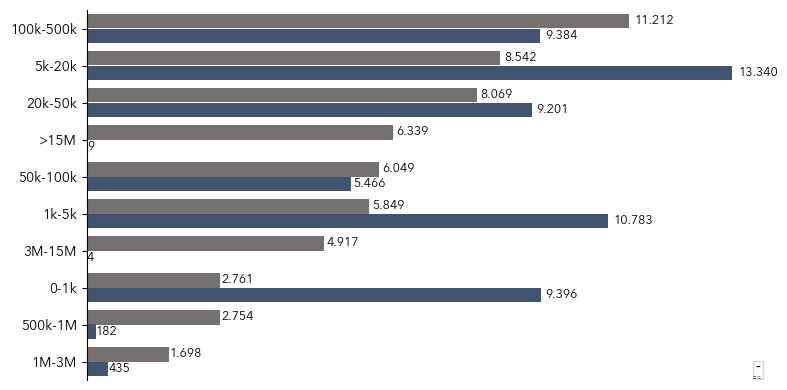

In [175]:
graf_compra_e_venda(
    df_cv=CGCV_dataf,
    filename_cv='CATEGORIAS_MCV.png',
    palette_cv={'Venda':'#767070', 'Compra':'#3B5279'}
)

findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

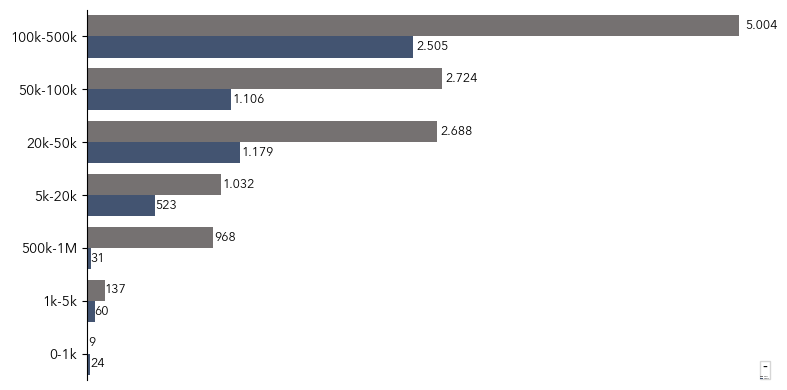

In [176]:
graf_compra_e_venda(
    df_cv=G15_CV_df,
    filename_cv='CATEGORIAS_GARE15_MCV.png',
    palette_cv={'Venda':'#767070', 'Compra':'#3B5279'}
)

findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

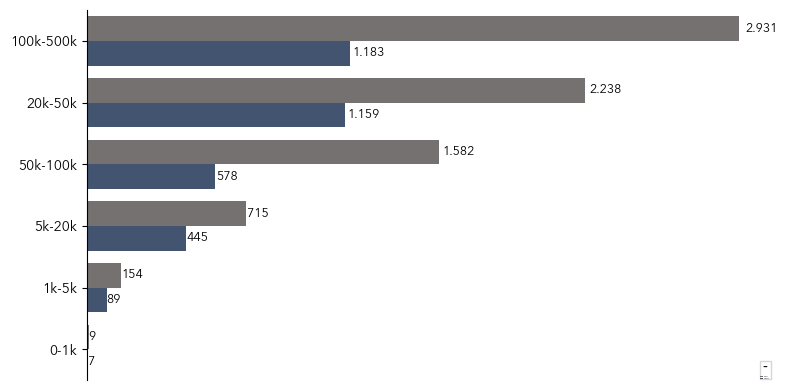

In [177]:
graf_compra_e_venda(
    df_cv=GALG15_CV_df,
    filename_cv='CATEGORIAS_GALG15_MCV.png',
    palette_cv={'Venda':'#767070', 'Compra':'#3B5279'}
)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_30980\3565949811.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='-', loc='lower right', fontsize=0)
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not fou

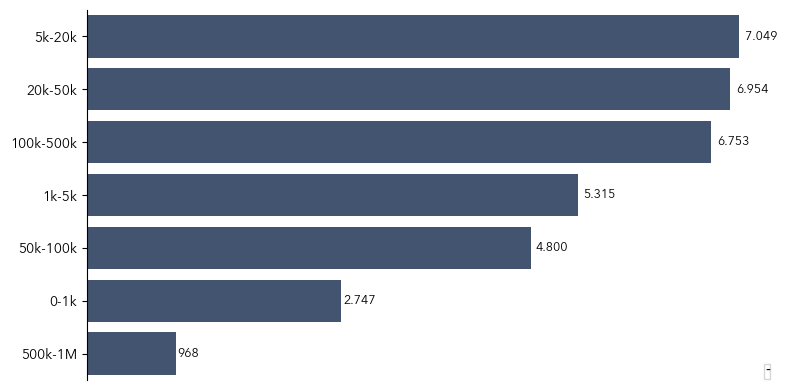

In [178]:
graf_barras_zeragens(
    df=CMZ_df,
    filename='CATEGORIAS_zeragem_volume.png',
    color='#3B5279'
)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_30980\3565949811.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='-', loc='lower right', fontsize=0)
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not fou

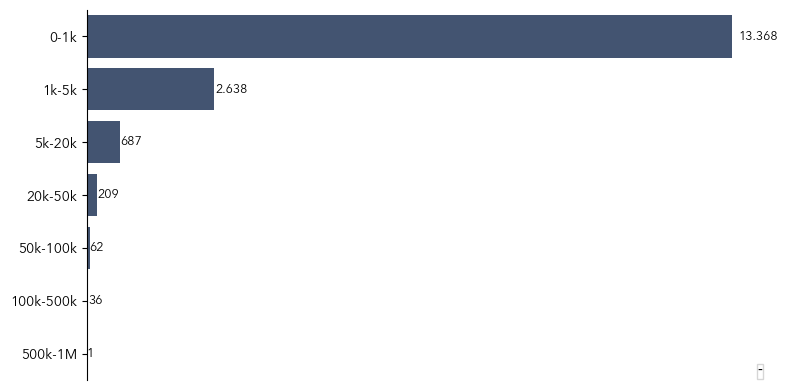

In [179]:
graf_barras_zeragens(
    df=CMZ_cotistas_df,
    filename='CATEGORIAS_zeragem_cotistas.png',
    color='#3B5279'
)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_30980\3565949811.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='-', loc='lower right', fontsize=0)
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not fou

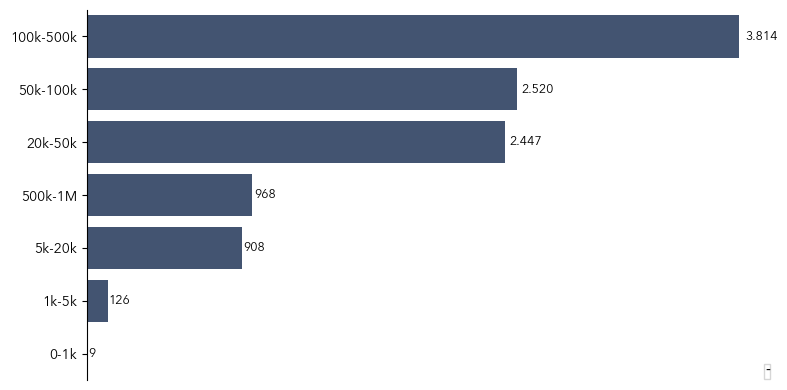

In [180]:
graf_barras_zeragens(
    df=zero_GARE15,
    filename='Zeragens_GARE15_Vol_Cat.png',
    color='#3B5279'
)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_30980\3565949811.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='-', loc='lower right', fontsize=0)
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not fou

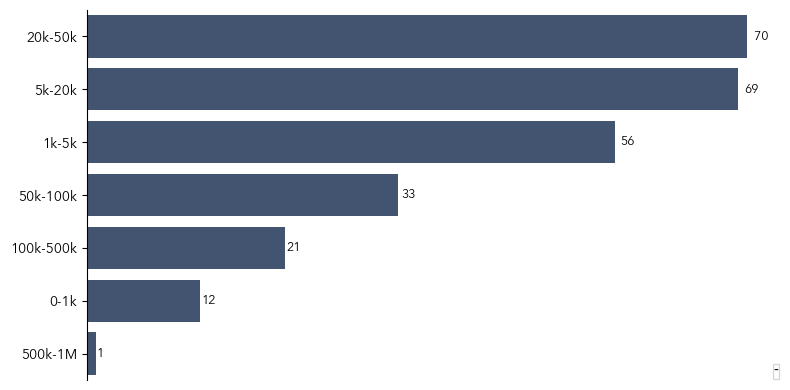

In [181]:
graf_barras_zeragens(
    df=zero_GARE15_qtde,
    filename='Zeragens_GARE15_Qtde_Cat.png',
    color='#3B5279'
)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_30980\3565949811.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='-', loc='lower right', fontsize=0)
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not fou

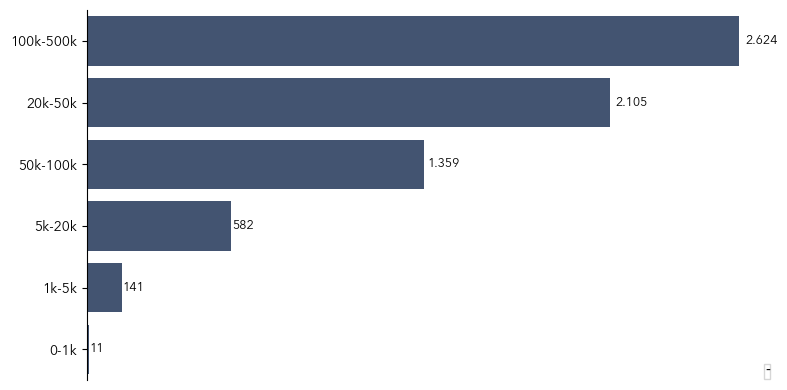

In [182]:
graf_barras_zeragens(
    df=GALG15_Z_df,
    filename='Zeragens_GALG15_Vol_Cat.png',
    color='#3B5279'
)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_30980\3565949811.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='-', loc='lower right', fontsize=0)
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not fou

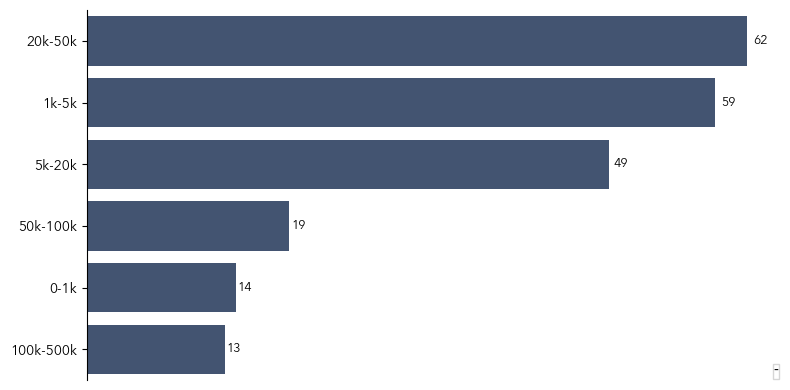

In [183]:
graf_barras_zeragens(
    df=GALG15_ZC_df,
    filename='Zeragens_GALG15_Qtde_Cat.png',
    color='#3B5279'
)

In [184]:
gare11 = ['GARE11.SA']
fundos = ['GARE11.SA', 'TRXF11.SA', 'KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA', 'ZAVI11.SA', 'HGRU11.SA',
          'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA', 'BTLG11.SA', 'XPLG11.SA', 'LVBI11.SA', 'BRCO11.SA', 'VILG11.SA', 'HSLG11.SA',
          'GGRC11.SA', 'TRBL11.SA', 'XPIN11.SA', 'RBRL11.SA', 'BTAL11.SA', 'PATL11.SA', 'BLMG11.SA', 'XPML11.SA',
          'VISC11.SA', 'HGBS11.SA', 'HSML11.SA', 'GZIT11.SA', 'MALL11.SA', 'BPML11.SA', 'PVBI11.SA', 'BRCR11.SA', 'JSRE11.SA',
          'HGRE11.SA', 'BROF11.SA', 'GTWR11.SA', 'KORE11.SA', 'VINO11.SA', 'RCRB11.SA', 'HGPO11.SA', 'TEPP11.SA', 'AIEC11.SA',
          'FATN11.SA', 'RECT11.SA', 'RZAT11.SA', 'AJFI11.SA', 'CPSH11.SA']
peers_diretos = ['KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA',
                 'HGRU11.SA', 'TRXF11.SA', 'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA',
                 'BTLG11.SA', 'XPLG11.SA', 'BRCO11.SA', 'LVBI11.SA', 'VILG11.SA', 'GARE11.SA']
tijolo = ['HIB Tijolo', 'XXXX', 'Renda Urbana', 'Logistico', 'Shopping', 'Lajes', 'Outros Imóveis']

def excluir_5_dig(COTA):
    return str(COTA)[:6]

def peers(x):
    if x in peers_diretos:
        return 'PEER'
    else:
        return 'NAO PEER'
    
def tijolo_papel(x):
    if x == 'Recebivel':
        return "Papel"
    elif x == "XXXX":
        return "Tijolo"
    else:
        return "Tijolo"
    
base_ativos = pd.read_excel('Base_ativos.xlsx')
pd.options.display.float_format
#base_ativos['VP MM'] = base_ativos['VP MM'].apply(lambda x: "{:,.0f}".format(x))
#base_ativos['LIQUIDEZ - MÉDIA'] = base_ativos['LIQUIDEZ - MÉDIA'].apply(lambda x: "{:,.0f}".format(x))
#base_ativos['LIQUIDEZ - SOMA'] = base_ativos['LIQUIDEZ - SOMA'].apply(lambda x: "{:,.0f}".format(x))
base_ativos['MACRO'] = base_ativos['TIPO'].apply(tijolo_papel)

base_tijolo = base_ativos.query('MACRO == "Tijolo"')

base_ativos


,TICKER,TIPO,VP MM,COTISTAS,COTAS,LIQUIDEZ - MÉDIA,LIQUIDEZ - SOMA,MACRO
0,KNRI11,HIB Tijolo,4.598154e+09,299245,28204047,5.435302e+06,1.102312e+08,Tijolo
1,TVRI11,HIB Tijolo,1.656481e+09,63026,15919690,2.116409e+06,4.238197e+07,Tijolo
2,ALZR11,HIB Tijolo,1.317588e+09,164422,122266250,1.659212e+06,3.347029e+07,Tijolo
3,GARE11,XXXX,1.327191e+09,379022,147458223,5.735727e+06,1.160975e+08,Tijolo
4,RBRP11,HIB Tijolo,9.258478e+08,64199,12179186,8.122382e+05,1.631831e+07,Tijolo
...,...,...,...,...,...,...,...,...
113,ICRI11,Recebivel,3.828567e+08,8943,3857359,7.046463e+05,1.419082e+07,Papel
114,LIFE11,Recebivel,3.382958e+08,17142,34368608,8.893423e+05,1.787316e+07,Papel
115,CYCR11,Recebivel,3.444020e+08,18068,36549445,5.415215e+05,1.102464e+07,Papel
116,CLIN11,Recebivel,4.257237e+08,11661,4346763,1.007649e+06,2.030175e+07,Papel


findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Aveni

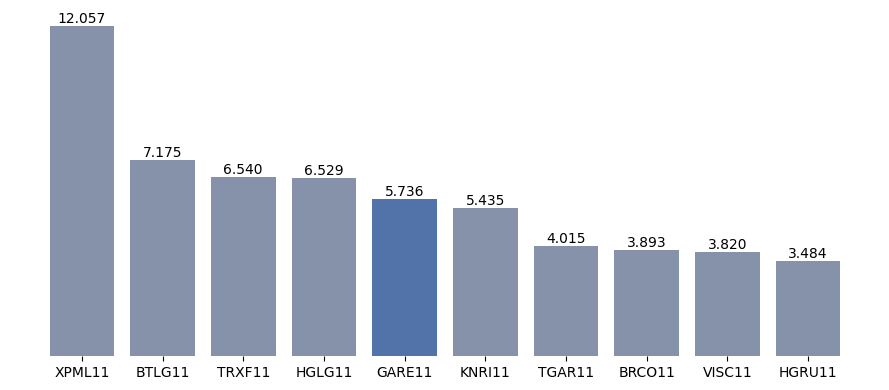

In [185]:
tic = 'TICKER'
liq = 'LIQUIDEZ - MÉDIA'
pl = 'VP MM'
#CRIO UM DATAFRAME COM AS MAIORES QUEDAS DO DIA ENTRE OS PEERS DO GARE E O GARE
TOP10_LIQUIDEZ = base_tijolo[[tic, liq, pl]]
TOP10_LIQUIDEZ = TOP10_LIQUIDEZ.sort_values(by=['LIQUIDEZ - MÉDIA'], ascending=False).iloc[:10, :]
TOP10_LIQUIDEZ['TICKER'] = TOP10_LIQUIDEZ['TICKER'].apply(excluir_5_dig)
TOP10_LIQUIDEZ['LIQUIDEZ - MÉDIA'] = TOP10_LIQUIDEZ['LIQUIDEZ - MÉDIA']/1000 

# Dados fornecidos
data = TOP10_LIQUIDEZ

# Criar o DataFrame
df = pd.DataFrame(data)

# Definir as cores para destacar o GARE11.SA
cores = ['#8592AA' if fundo != 'GARE11' else '#5173A9' for fundo in df['TICKER']] 

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(9, 4))
barras = ax.bar(df['TICKER'], df['LIQUIDEZ - MÉDIA'], color=cores)

# Adicionar rótulos de barra com separadores de milhares (usando ponto)
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2, altura,  # Ajuste de posição vertical
        f'{altura:,.0f}'.replace(',', '.'),  # Formatar com separador de milhares como ponto
        ha='center', va='bottom', color='black', fontsize=10
    )

# Personalizar o gráfico
ax.set_xlabel('')
ax.set_title('', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# Ajustar layout
plt.xticks(rotation=360)

for tick in ax.get_xticklabels():
    tick.set_color('black')

ax.spines['bottom'].set_color('black')
plt.tight_layout()

fig.savefig('TOP10_LIQUIDEZ_MÉDIA.png', transparent = True, dpi=300, bbox_inches='tight')

# Exibir o gráfico
#plt.show()

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_30980\2787156438.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOP10_LIQUIDEZ_SOMA['LIQ/VP'] =  TOP10_LIQUIDEZ_SOMA['LIQUIDEZ - SOMA']/TOP10_LIQUIDEZ_SOMA['VP MM']
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not found.
findfont: Font family 'Avenir Next LT Pro' not

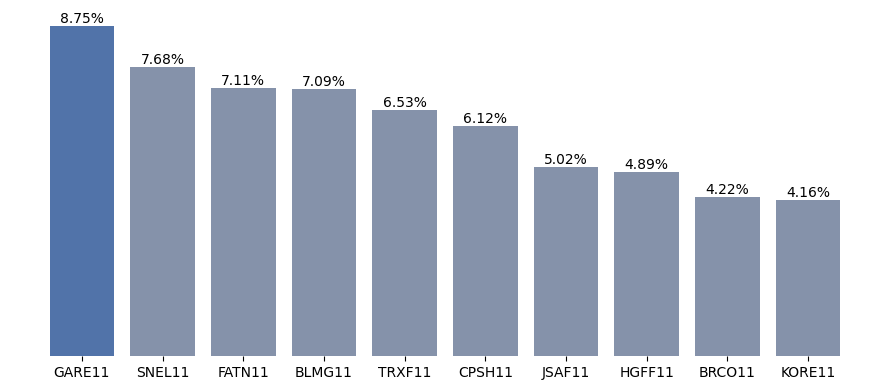

In [186]:
tic = 'TICKER'
liq = 'LIQUIDEZ - SOMA'
pl = 'VP MM'
#CRIO UM DATAFRAME COM AS MAIORES QUEDAS DO DIA ENTRE OS PEERS DO GARE E O GARE
TOP10_LIQUIDEZ_SOMA = base_tijolo[[tic, liq, pl]]
TOP10_LIQUIDEZ_SOMA['LIQ/VP'] =  TOP10_LIQUIDEZ_SOMA['LIQUIDEZ - SOMA']/TOP10_LIQUIDEZ_SOMA['VP MM']
TOP10_LIQUIDEZ_SOMA = TOP10_LIQUIDEZ_SOMA.sort_values(by=['LIQ/VP'], ascending=False).iloc[:10, :]
TOP10_LIQUIDEZ_SOMA['TICKER'] = TOP10_LIQUIDEZ_SOMA['TICKER'].apply(excluir_5_dig)

data = TOP10_LIQUIDEZ_SOMA


# Criar o DataFrame
df = pd.DataFrame(data)

cores = ['#8592AA' if fundo != 'GARE11' else '#5173A9' for fundo in df['TICKER']]

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(9, 4))
barras = ax.bar(df['TICKER'], df['LIQ/VP'], color=cores)


# Adicionar rótulos de barra como porcentagem
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2, altura,  # Ajuste de posição vertical
        f'{altura:.2%}',  # Formatar como porcentagem
        ha='center', va='bottom', color = 'black', fontsize=10
    )

# Personalizar o gráfico
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# Ajustar layout
plt.xticks(rotation=360)

for tick in ax.get_xticklabels():
    tick.set_color('black')

ax.spines['bottom'].set_color('black')
plt.tight_layout()

fig.savefig('TOP10_LIQSOMAxPL.png', transparent=True, dpi=300, bbox_inches = 'tight')

# Exibir o gráfico
#plt.show()

In [187]:
from pptx import Presentation
from pptx.util import Inches, Pt, Cm

#Caminho PPT e Imagens
c_ppt = r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GARE\RELATÓRIO\RELATORIO_MENSAL_GARE.pptx"
img_compra = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\COMPRA_PF_E_PJ.png"
img_venda = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\VENDA_PF_E_PJ.png"
c_img_CAT_MCV = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\CATEGORIAS_MCV.png"
c_img_zer_vol = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\CATEGORIAS_zeragem_volume.png"
c_zer_img_qtde = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\CATEGORIAS_zeragem_cotistas.png"
c_img_CAT_GARE15_MCV = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\CATEGORIAS_GARE15_MCV.png"
c_img_zer_GARE15_Vol = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\Zeragens_GARE15_Vol_Cat.png"
c_img_zer_GARE15_Qtde = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\Zeragens_GARE15_Qtde_Cat.png"
c_img_CAT_GALG15_MCV = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\CATEGORIAS_GALG15_MCV.png"
c_img_zer_GALG15_Vol = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\Zeragens_GALG15_Vol_Cat.png"
c_img_zer_GALG15_Qtde = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\Zeragens_GALG15_Qtde_Cat.png"
img_top10_liq_SOMAxPL = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\TOP10_LIQSOMAxPL.png"
img_TOP10_liq_MEDIA = r"C:\\Users\\LucasCavalcante\\Desktop\\Relatorio_Passivos_Guardian\\Relat-rios-Passivo\\TOP10_LIQUIDEZ_MEDIA.png"

#Abre a apresentação
prs=Presentation(c_ppt)

#Selecionando os slides e definindo a posição das imagens

slide1 = prs.slides[0]
slide2 = prs.slides[1]

#Imagem Compra
leftC = Cm(10.24)
topC = Cm(14.89)
widthC = Cm(7.53)
heightC = Cm(5.47)

#Imagem Venda
leftV = Cm(2.7)
topV = Cm(14.89)
widthV = Cm(7.68)
heightV = Cm(5.48)

#Imagem Categorias CxV
leftCxV = Cm(-0.11)
topCxV = Cm(3.12)
widthCxV = Cm(7.39)
heightCxV = Cm(3.66)

#Imagem Categorias Zeragem Vol
leftZ_vol = Cm(7.47)
topZ_vol = Cm(3.24)
widthZ_vol = Cm(6.69)
heightZ_vol = Cm(3.32)

#Imagem Categorias Zeragem Qtde
leftZ_qtde = Cm(14.31)
topZ_qtde = Cm(3.24)
widthZ_qtde = Cm(6.69)
heightZ_qtde = Cm(3.32)

#Imagem Compra e Venda - GARE15
leftCxV_GARE15 = Cm(-0.05)
topCxV_GARE15 = Cm(8.01)
widthCxV_GARE15 = Cm(7.39)
heightCxV_GARE15 = Cm(3.66)

#Imagem Categorias Zeragem Vol - GARE15
leftZ_vol_GARE15 = Cm(7.49)
topZ_vol_GARE15 = Cm(7.99)
widthZ_vol_GARE15 = Cm(6.69)
heightZ_vol_GARE15 = Cm(3.32)

#Imagem Categorias Zeragem Qtde - GARE15
leftZ_qtde_GARE15 = Cm(14.33)
topZ_qtde_GARE15 = Cm(7.96)
widthZ_qtde_GARE15 = Cm(6.71)
heightZ_qtde_GARE15 = Cm(3.32)

#Imagem Compra e Venda - GALG15
leftCxV_GALG15 = Cm(-0.07)
topCxV_GALG15 = Cm(12.57)
widthCxV_GALG15 = Cm(7.39)
heightCxV_GALG15 = Cm(3.66)

#Imagem Categorias Zeragem Vol - GALG15
leftZ_vol_GALG15 = Cm(7.49)
topZ_vol_GALG15 = Cm(12.78)
widthZ_vol_GALG15 = Cm(6.69)
heightZ_vol_GALG15 = Cm(3.32)

#Imagem Categorias Zeragem Qtde - GALG15
leftZ_qtde_GALG15 = Cm(14.34)
topZ_qtde_GALG15 = Cm(12.77)
widthZ_qtde_GALG15 = Cm(6.71)
heightZ_qtde_GALG15 = Cm(3.32)

#Imagem TOP 10 Liquidez SOMA x PL
left_LiqSoma = Cm(-0.28)
top_LiqSoma = Cm(24.47)
width_LiqSoma = Cm(10.99)
height_LiqSoma = Cm(4.82)

#Imagem TOP 10 Liquidez Média
left_Media = Cm(10.38)
top_Media = Cm(24.45)
width_Media = Cm(10.99)
height_Media = Cm(4.82)

#Adicionando as imagens aos slides

## Slide 1
slide1.shapes.add_picture(img_compra, leftC, topC, width=widthC, height=heightC)
slide1.shapes.add_picture(img_venda, leftV, topV, width=widthV, height=heightV)
## Slide2
slide2.shapes.add_picture(c_img_CAT_MCV, leftCxV, topCxV, width=widthCxV, height=heightCxV)
slide2.shapes.add_picture(c_img_zer_vol, leftZ_vol, topZ_vol, width=widthZ_vol, height=heightZ_vol)
slide2.shapes.add_picture(c_zer_img_qtde, leftZ_qtde, topZ_qtde, width=widthZ_qtde, height=heightZ_qtde)
slide2.shapes.add_picture(c_img_CAT_GARE15_MCV, leftCxV_GARE15, topCxV_GARE15, width=widthCxV_GARE15, height=heightCxV_GARE15)
slide2.shapes.add_picture(c_img_zer_GARE15_Vol, leftZ_vol_GARE15, topZ_vol_GARE15, width=widthZ_vol_GARE15, height=heightZ_vol_GARE15)
slide2.shapes.add_picture(c_img_zer_GARE15_Qtde, leftZ_qtde_GARE15, topZ_qtde_GARE15, width=widthZ_qtde_GARE15, height=heightZ_qtde_GARE15)
slide2.shapes.add_picture(c_img_CAT_GALG15_MCV, leftCxV_GALG15, topCxV_GALG15, width=widthCxV_GALG15, height=heightCxV_GALG15)
slide2.shapes.add_picture(c_img_zer_GALG15_Vol, leftZ_vol_GALG15, topZ_vol_GALG15, width=widthZ_vol_GALG15, height=heightZ_vol_GALG15)
slide2.shapes.add_picture(c_img_zer_GALG15_Qtde, leftZ_qtde_GALG15, topZ_qtde_GALG15, width=widthZ_qtde_GALG15, height=heightZ_qtde_GALG15)
slide2.shapes.add_picture(img_top10_liq_SOMAxPL, left_LiqSoma, top_LiqSoma, width=width_LiqSoma, height=height_LiqSoma)
slide2.shapes.add_picture(img_TOP10_liq_MEDIA, left_Media, top_Media, width=width_Media, height=height_Media)

#Salvando a apresentação
prs.save(r"g:\.shortcut-targets-by-id\1YZLLTFOuLniE6hO7WNHXl2c3MSa4TOv6\X. GAME11\GUARDIAN Institucional\5. Planejamento & Processos\2. 2023\4. Research\2025\5. Inteligência Passivos Guardian\2. RELATÓRIOS\3. MENSAL\GARE\RELATÓRIO\RELATORIO_MENSAL_GARE_GRAFICOS.pptx")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\\\Users\\\\LucasCavalcante\\\\Desktop\\\\Relatorio_Passivos_Guardian\\\\Relat-rios-Passivo\\\\TOP10_LIQUIDEZ_MEDIA.png'